# I. Importation des bibliothèques de travail

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb 
from sklearn import preprocessing 
from sklearn.cluster import KMeans 
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster 

# II. Description du fichier de données « fromages.csv »

## 1. Importation et lecture des données

In [2]:
data = pd.read_csv("fromages.csv",sep = ';',header=0,index_col=0) 
print(data.shape) 
print (data)

(29, 9)
                    calories  sodium  calcium  lipides  retinol  folates  \
Fromages                                                                   
CarredelEst              314   353.5     72.6     26.3     51.6     30.3   
Babybel                  314   238.0    209.8     25.1     63.7      6.4   
Beaufort                 401   112.0    259.4     33.3     54.9      1.2   
Bleu                     342   336.0    211.1     28.9     37.1     27.5   
Camembert                264   314.0    215.9     19.5    103.0     36.4   
Cantal                   367   256.0    264.0     28.8     48.8      5.7   
Chabichou                344   192.0     87.2     27.9     90.1     36.3   
Chaource                 292   276.0    132.9     25.4    116.4     32.5   
Cheddar                  406   172.0    182.3     32.5     76.4      4.9   
Comte                    399    92.0    220.5     32.4     55.9      1.3   
Coulomniers              308   222.0     79.2     25.6     63.6     21.1   
Edam

## 2. Afficher les 5 premiers et 5 derniers lignes des données

In [3]:
print (data.head()) 
print (data.tail()) 

             calories  sodium  calcium  lipides  retinol  folates  proteines  \
Fromages                                                                       
CarredelEst       314   353.5     72.6     26.3     51.6     30.3       21.0   
Babybel           314   238.0    209.8     25.1     63.7      6.4       22.6   
Beaufort          401   112.0    259.4     33.3     54.9      1.2       26.6   
Bleu              342   336.0    211.1     28.9     37.1     27.5       20.2   
Camembert         264   314.0    215.9     19.5    103.0     36.4       23.4   

             cholesterol  magnesium  
Fromages                             
CarredelEst           70         20  
Babybel               70         27  
Beaufort             120         41  
Bleu                  90         27  
Camembert             60         20  
                    calories  sodium  calcium  lipides  retinol  folates  \
Fromages                                                                   
Rocquefort           

## 3. Afficher les noms des 9 colonnes avec leurs types

In [4]:
print(data.columns) 
print (data.dtypes) 

Index(['calories', 'sodium', 'calcium', 'lipides', 'retinol', 'folates',
       'proteines', 'cholesterol', 'magnesium'],
      dtype='object')
calories         int64
sodium         float64
calcium        float64
lipides        float64
retinol        float64
folates        float64
proteines      float64
cholesterol      int64
magnesium        int64
dtype: object


In [5]:
print(list(data.index.values))

['CarredelEst', 'Babybel', 'Beaufort', 'Bleu', 'Camembert', 'Cantal', 'Chabichou', 'Chaource', 'Cheddar', 'Comte', 'Coulomniers', 'Edam', 'Emmental', 'Fr.chevrepatemolle', 'Fr.fondu.45', 'Fr.frais20nat.', 'Fr.frais40nat.', 'Maroilles', 'Morbier', 'Parmesan', 'Petitsuisse40', 'PontlEveque', 'Pyrenees', 'Reblochon', 'Rocquefort', 'SaintPaulin', 'Tome', 'Vacherin', 'Yaourtlaitent.nat.']


## 4. Préciser : Liste des individus, liste des variables quantitatives, liste des variables qualitatives  :

Liste des individus : ['CarredelEst', 'Babybel', 'Beaufort', 'Bleu', 'Camembert', 'Cantal', 'Chabichou', 'Chaource', 'Cheddar', 'Comte', 'Coulomniers', 'Edam', 'Emmental', 'Fr.chevrepatemolle', 'Fr.fondu.45', 'Fr.frais20nat.', 'Fr.frais40nat.', 'Maroilles', 'Morbier', 'Parmesan', 'Petitsuisse40', 'PontlEveque', 'Pyrenees', 'Reblochon', 'Rocquefort', 'SaintPaulin', 'Tome', 'Vacherin', 'Yaourtlaitent.nat.']

 liste des variables quantitatives :  ['calories', 'sodium', 'calcium', 'lipides', 'retinol', 'folates','proteines', 'cholesterol', 'magnesium']
 
 liste des variables qualitatives : pour notre cas d'etudes , on n'a pas de variables qualitatives
 

## 5. statistiques descriptives et graphique

In [6]:
print (data.describe().transpose()) 

             count        mean         std   min    25%    50%    75%    max
calories      29.0  300.034483   91.914356  70.0  292.0  321.0  355.0  406.0
sodium        29.0  210.086207  108.678923  22.0  140.0  223.0  276.0  432.0
calcium       29.0  185.734483   72.528882  72.6  132.9  202.3  220.5  334.6
lipides       29.0   24.158621    8.129642   3.4   23.4   26.3   29.1   33.3
retinol       29.0   67.562069   24.163098  37.1   51.6   62.3   76.4  150.5
folates       29.0   13.010345   11.723339   1.2    4.9    6.4   21.1   36.4
proteines     29.0   20.168966    6.959788   4.1   17.8   21.0   23.4   35.7
cholesterol   29.0   74.586207   28.245755  10.0   70.0   80.0   90.0  120.0
magnesium     29.0   26.965517   11.318388  10.0   20.0   26.0   30.0   51.0


,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
calories,1.000000,0.447224,0.433400,0.983634,-0.042885,-0.321098,0.885372,0.961923,0.745443
sodium,0.447224,1.000000,0.005959,0.483344,0.144328,0.136561,0.275998,0.332994,0.031113
calcium,0.433400,0.005959,1.000000,0.341132,-0.289547,-0.637503,0.610705,0.428446,0.710480
lipides,0.983634,0.483344,0.341132,1.000000,-0.018353,-0.276543,0.809303,0.955444,0.689860
retinol,-0.042885,0.144328,-0.289547,-0.018353,1.000000,0.517266,-0.039173,-0.086972,-0.099801
folates,-0.321098,0.136561,-0.637503,-0.276543,0.517266,1.000000,-0.352871,-0.366346,-0.447067
proteines,0.885372,0.275998,0.610705,0.809303,-0.039173,-0.352871,1.000000,0.817138,0.787777
cholesterol,0.961923,0.332994,0.428446,0.955444,-0.086972,-0.366346,0.817138,1.000000,0.752453
magnesium,0.745443,0.031113,0.710480,0.689860,-0.099801,-0.447067,0.787777,0.752453,1.000000


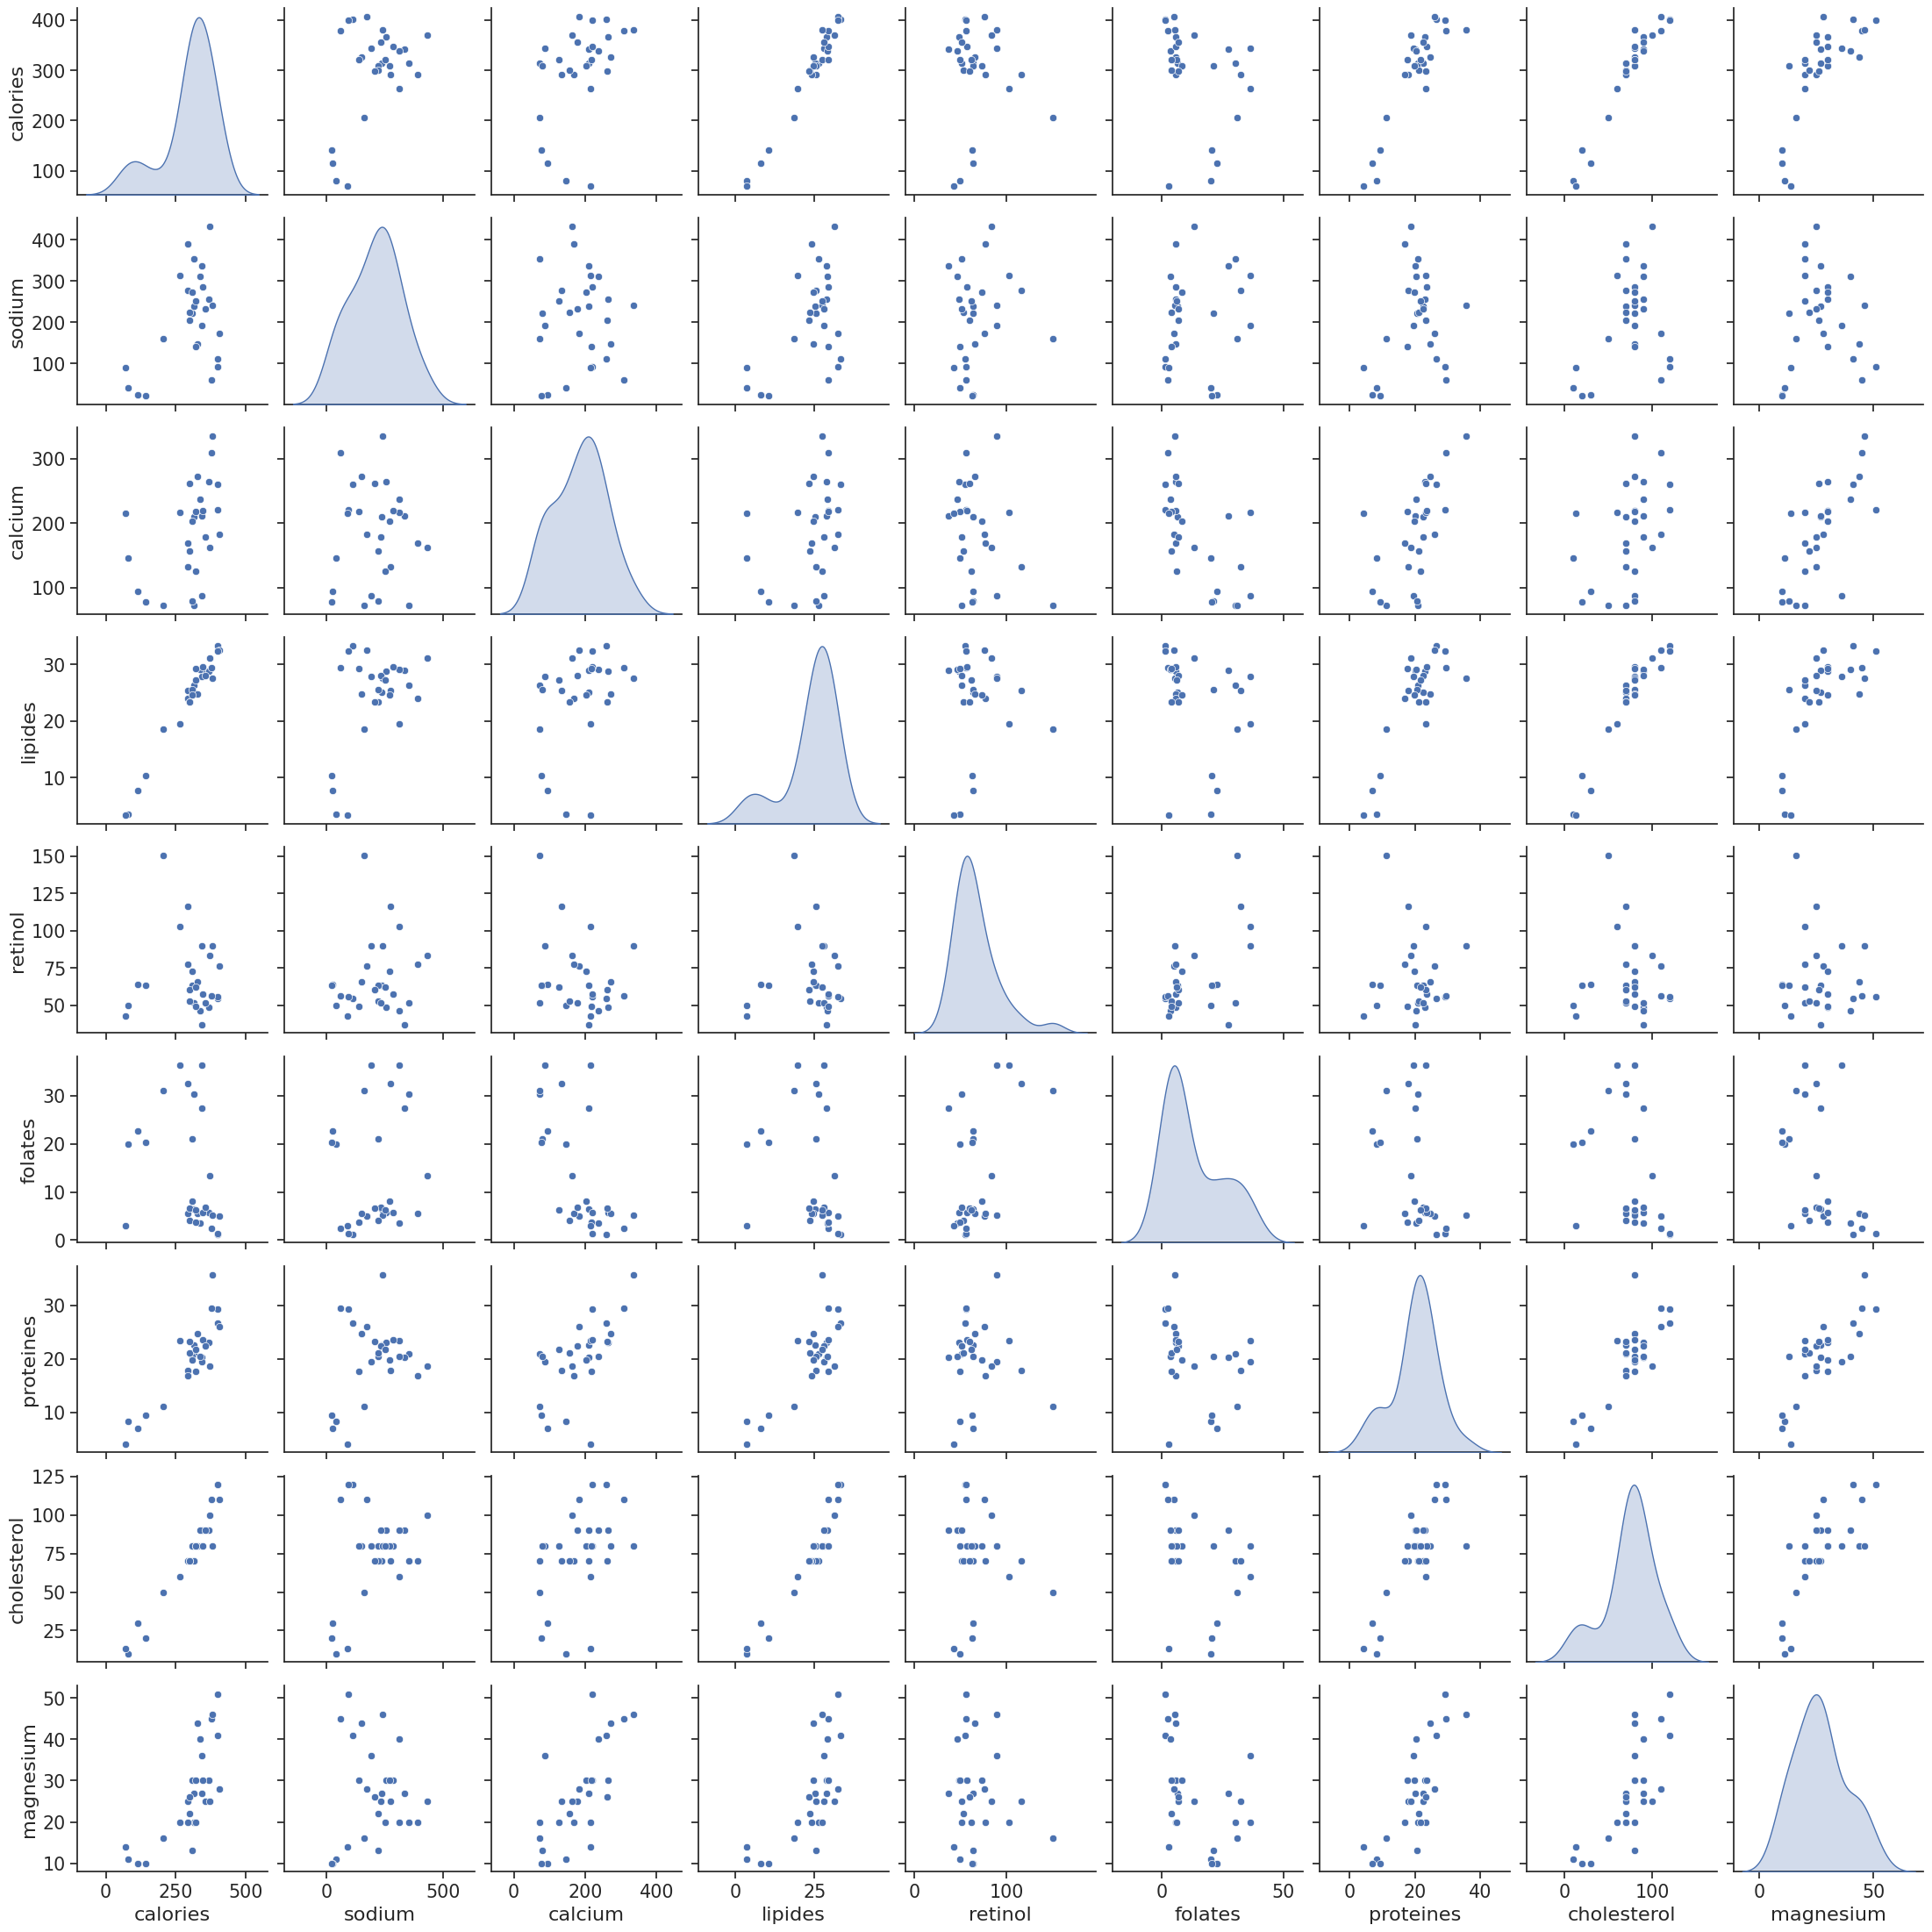

In [7]:
sb.set(font_scale=1.35, style="ticks") 
plot = sb.pairplot(data, diag_kind='kde') 
data.corr()

## 6. Application de L’algorithme CAH avec la distance de ward

In [8]:
# Standardiser les données 
fromage_cr = preprocessing.scale(data) 
# générer la matrice de liaison - méthode de ward 
Z = linkage(fromage_cr,method='ward',metric='euclidean')

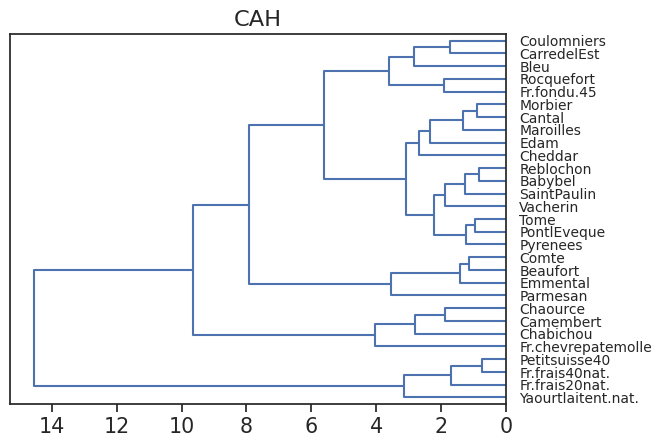

In [9]:
plt.title("CAH") 
dendrogram(Z,labels=data.index,orientation='left',color_threshold=0) 
plt.show()

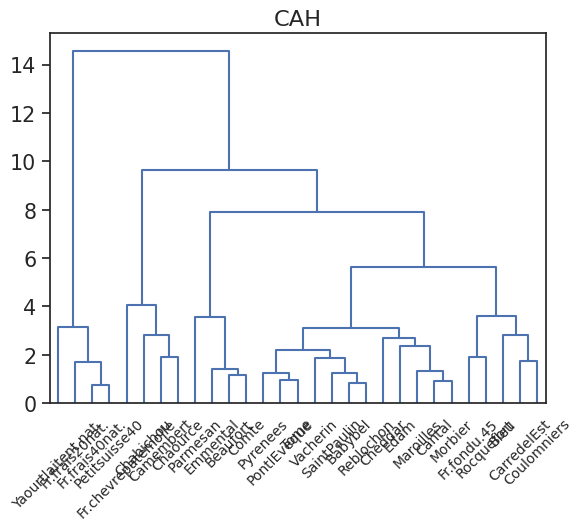

In [10]:
plt.title("CAH") 
dendrogram(Z,labels=data.index,orientation='top',color_threshold=0) 
plt.show()

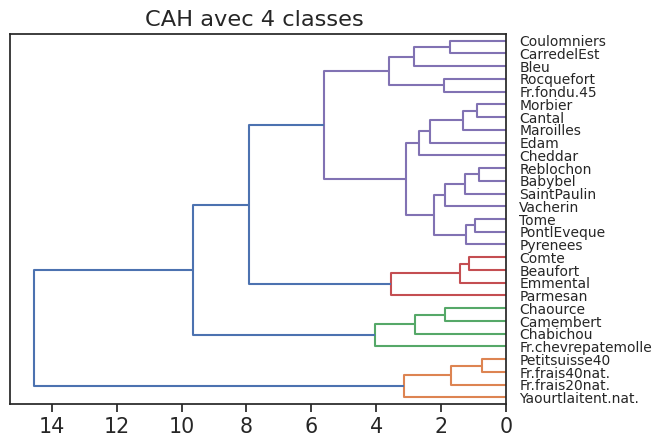

In [11]:
plt.title("CAH avec 4 classes ") 
dendrogram(Z,labels=data.index,orientation='left',color_threshold=7) 
plt.show()

In [12]:
groupes_cah_4 = fcluster(Z,t=7,criterion='distance') 
id_groupe_tri = np.argsort(groupes_cah_4) 
print(pd.DataFrame(data.index[id_groupe_tri ],groupes_cah_4[id_groupe_tri ]))

             Fromages
1  Yaourtlaitent.nat.
1      Fr.frais20nat.
1       Petitsuisse40
1      Fr.frais40nat.
2  Fr.chevrepatemolle
2           Camembert
2           Chabichou
2            Chaource
3            Emmental
3            Parmesan
3            Beaufort
3               Comte
4            Pyrenees
4         PontlEveque
4          Rocquefort
4         SaintPaulin
4                Tome
4           Reblochon
4         CarredelEst
4           Maroilles
4            Vacherin
4                Edam
4         Coulomniers
4             Cheddar
4              Cantal
4                Bleu
4             Babybel
4             Morbier
4         Fr.fondu.45


In [13]:
#transformer les labels en une dataframe nommé classe 
label=pd.DataFrame(groupes_cah_4, columns=['classe']) 
#créer une copie de la variable data 
nouvelleData = data.copy() 
#ajouter label à nouvelleData 
nouvelleData['classe']=label.values

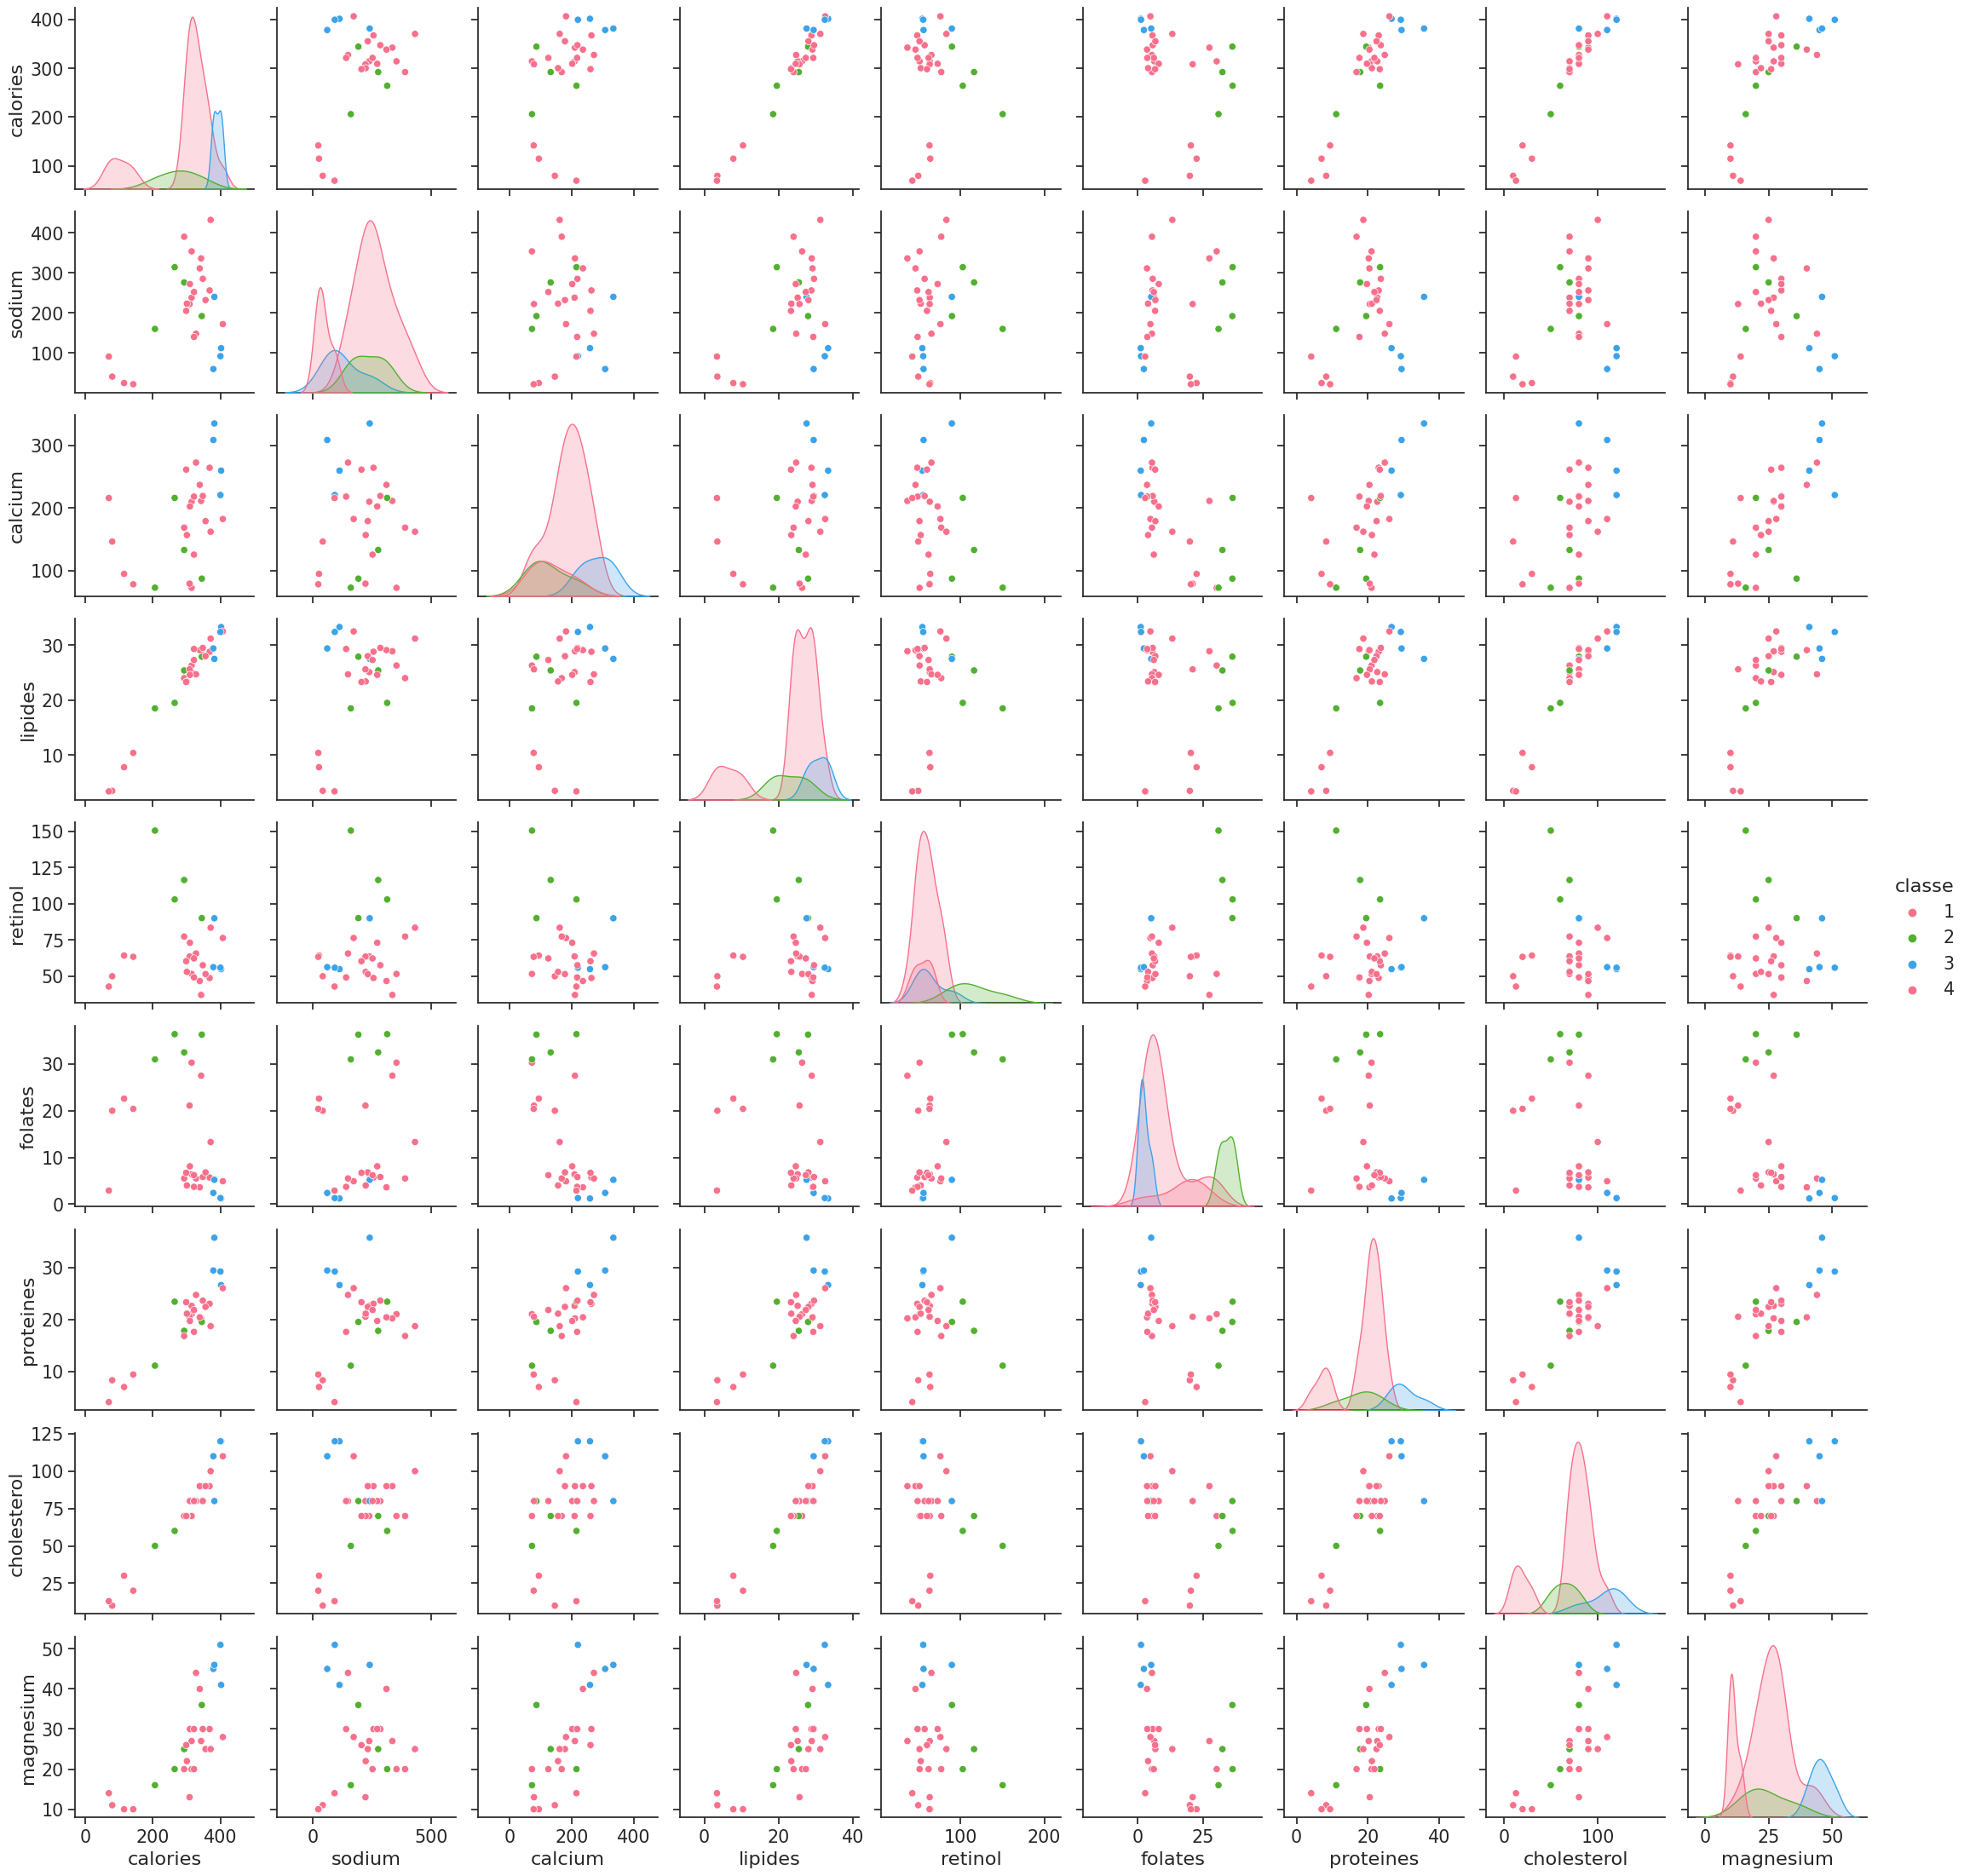

In [14]:
sb.set(font_scale=1.35, style="ticks") 
plot = sb.pairplot(nouvelleData,hue='classe', diag_kind='kde', palette="husl") 

## 7. Application de L’algorithme K-means sur les données standardisé pour avoir un regroupement sur 4 classes. 

In [15]:
kmeans = KMeans(n_clusters=4) 
kmeans.fit(fromage_cr) 

KMeans(n_clusters=4)

In [16]:
id_trie_kmeans = np.argsort(kmeans.labels_) 
print(pd.DataFrame(data.index[id_trie_kmeans],kmeans.labels_[id_trie_kmeans])) 

             Fromages
0  Yaourtlaitent.nat.
0       Petitsuisse40
0      Fr.frais40nat.
0      Fr.frais20nat.
1                Tome
1         SaintPaulin
1          Rocquefort
1           Reblochon
1            Pyrenees
1         PontlEveque
1             Morbier
1           Maroilles
1            Vacherin
1         Fr.fondu.45
1             Cheddar
1              Cantal
1                Bleu
1             Babybel
2         Coulomniers
2            Chaource
2           Chabichou
2           Camembert
2  Fr.chevrepatemolle
2         CarredelEst
3            Emmental
3                Edam
3               Comte
3            Parmesan
3            Beaufort


## 8. Correspondance avec les groupes de CAH : Nombre des individus dans chaque classe. 

In [17]:
print ("regroupement avec CAH:") 
group_class_CAH=data.groupby(groupes_cah_4) 
nbr_indv_per_Class_CAH = group_class_CAH.size() 
print (nbr_indv_per_Class_CAH) 
print ("regroupement avec Kmeans") 
group_class_kmeans=data.groupby(kmeans.labels_) 
nbr_indv_per_Class_kmeans = group_class_kmeans.size() 
print (nbr_indv_per_Class_kmeans) 

regroupement avec CAH:
1     4
2     4
3     4
4    17
dtype: int64
regroupement avec Kmeans
0     4
1    14
2     6
3     5
dtype: int64


In [18]:
#index triée des groupes 
idgk = np.argsort(kmeans.labels_) 
#Affichages des noms d’instance (nom individus) et de leur numéro de classe avec les deux méthodes 
print(pd.DataFrame({'id':data.index,'id kmeans':kmeans.labels_[idgk],'id CAH':groupes_cah_4[idgk]}))

                    id  id kmeans  id CAH
0          CarredelEst          0       1
1              Babybel          0       1
2             Beaufort          0       1
3                 Bleu          0       1
4            Camembert          1       4
5               Cantal          1       4
6            Chabichou          1       4
7             Chaource          1       4
8              Cheddar          1       4
9                Comte          1       4
10         Coulomniers          1       4
11                Edam          1       4
12            Emmental          1       4
13  Fr.chevrepatemolle          1       4
14         Fr.fondu.45          1       4
15      Fr.frais20nat.          1       4
16      Fr.frais40nat.          1       4
17           Maroilles          1       4
18             Morbier          2       4
19            Parmesan          2       2
20       Petitsuisse40          2       2
21         PontlEveque          2       2
22            Pyrenees          2 

[0.48626255 0.38724166 0.34540073 0.31602974 0.30639458 0.30616292
 0.23617973 0.27022504 0.2583785 ]


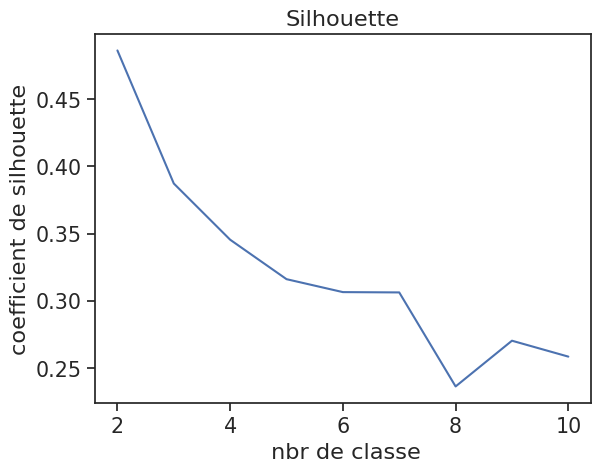

In [19]:
#librairie pour l'évaluatin des partitions 
from sklearn import metrics 
#utilisation de la métrique "silhouette" pour varier les nombre de classes de 2 à 10
res= np.arange(9,dtype="double") 
for k in np.arange(9): 
 km=KMeans(n_clusters=k+2) 
 km.fit(fromage_cr) 
 res[k]= metrics.silhouette_score(fromage_cr,km.labels_) 
print (res) 
#graphique 
plt.plot(np.arange (2,11,1),res) 
plt.title("Silhouette") 
plt.xlabel(" nbr de classe") 
plt.ylabel("coefficient de silhouette") 
plt.show()